In [18]:
import joblib
import runpy

import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as model_selection

from datetime import datetime, timedelta
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [19]:
NUM_COLS = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [20]:
# Chạy file crawl.py để lấy dữ liệu mới nhất
runpy.run_path('crawl.py')

{'__name__': '<run_path>',
 '__doc__': None,
 '__package__': '',
 '__loader__': None,
 '__spec__': None,
 '__file__': 'crawl.py',
 '__cached__': None,
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len is\nthe full name for the built-in function len().\n\nThis module is not normally accessed explicitly by most\napplications, but can be useful in modules that provide\nobjects with the same name as a built-in value, but in\nwhich the built-in of that name is also needed.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
  '__build_class__': <function __build_class__>,
  '__import__': <function __import__(name, globals=None, locals=None, fromlist=(), level=0)>,
  'abs': <function abs(x, 

In [21]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('lottery.csv')
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000
mean,10.438313,10.598427,10.602859,10.571980,10.630021,10.533238,10.540958,10.615154,10.535811,10.540815
std,3.300249,3.310605,3.330536,3.308478,3.297396,3.315526,3.297797,3.346367,3.332189,3.275307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,10.000000,10.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [22]:
# Loại bỏ các hàng có tất cả các cột từ zero đến nine đều bằng 0
df = df[df.iloc[:, 1:].all(axis=1)]
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000
mean,10.562364,10.739678,10.744169,10.712878,10.771693,10.673620,10.681443,10.756628,10.676228,10.681298
std,3.080888,3.096609,3.117988,3.095526,3.080824,3.104937,3.085390,3.134555,3.122844,3.061025
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,9.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [23]:
# Chuẩn bị dữ liệu
X = df.drop(columns=['Date']).values
y = df[NUM_COLS].values

In [24]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Chuẩn hóa dữ liệu bằng scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Reshape lại dữ liệu để phù hợp với input của mạng LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [27]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(10))
model.compile(loss='mse', optimizer='adam')

In [28]:
# Huấn luyện mô hình
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=2)

Epoch 1/100
346/346 - 2s - loss: 51.8658 - val_loss: 9.6828 - 2s/epoch - 5ms/step
Epoch 2/100
346/346 - 0s - loss: 9.6234 - val_loss: 9.5376 - 374ms/epoch - 1ms/step
Epoch 3/100
346/346 - 0s - loss: 9.5960 - val_loss: 9.5138 - 353ms/epoch - 1ms/step
Epoch 4/100
346/346 - 0s - loss: 9.5740 - val_loss: 9.4980 - 361ms/epoch - 1ms/step
Epoch 5/100
346/346 - 0s - loss: 9.5477 - val_loss: 9.4611 - 381ms/epoch - 1ms/step
Epoch 6/100
346/346 - 0s - loss: 9.5085 - val_loss: 9.4141 - 368ms/epoch - 1ms/step
Epoch 7/100
346/346 - 0s - loss: 9.4487 - val_loss: 9.3308 - 373ms/epoch - 1ms/step
Epoch 8/100
346/346 - 0s - loss: 9.3280 - val_loss: 9.1564 - 363ms/epoch - 1ms/step
Epoch 9/100
346/346 - 0s - loss: 9.0565 - val_loss: 8.7596 - 388ms/epoch - 1ms/step
Epoch 10/100
346/346 - 0s - loss: 8.4809 - val_loss: 7.9626 - 361ms/epoch - 1ms/step
Epoch 11/100
346/346 - 0s - loss: 7.4533 - val_loss: 6.7189 - 360ms/epoch - 1ms/step
Epoch 12/100
346/346 - 0s - loss: 6.0181 - val_loss: 5.1370 - 366ms/epoch - 

In [29]:
# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 0.011191433295607567


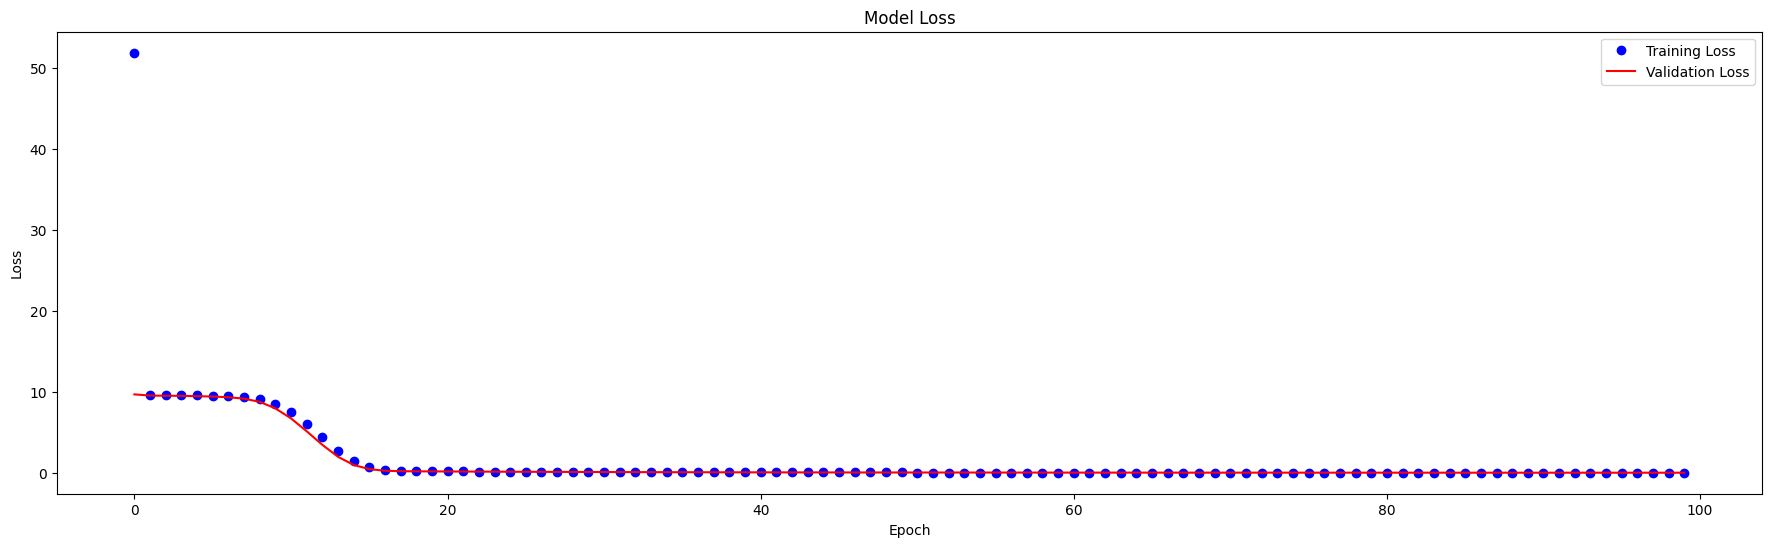

In [30]:
# Vẽ biểu đồ loss
plt.figure(figsize=(22, 6))
plt.plot(history.history['loss'],'bo', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [31]:
# Lưu mô hình và scaler
model.save('lottery.keras')
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [32]:
# Nhập ngày cần lấy dữ liệu
ngay = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
ngay

'2024-02-25'

In [33]:
# Tạo dictionary giữa các cột từ zero đến nine và dự đoán tương ứng
row_scaled = scaler.transform(df.loc[df['Date'] == ngay, 'Zero':'Nine'].values)
predictions_dict = {col_name: prediction for col_name, prediction in zip(NUM_COLS, model.predict(row_scaled.reshape((row_scaled.shape[0], 1, row_scaled.shape[1])))[0])}
predictions_dict

1/1 [==============================] - 0s 451ms/step


{'Zero': 14.9122,
 'One': 12.900646,
 'Two': 6.936905,
 'Three': 1.9844005,
 'Four': 10.936113,
 'Five': 11.931505,
 'Six': 14.033358,
 'Seven': 13.183563,
 'Eight': 11.918371,
 'Nine': 7.914744}

In [34]:
# Kết quả dự đoán cao nhất và thấp nhất
predictions_items = predictions_dict.items()
print(f'''Cặp số có giá trị dự đoán cao nhất: {dict(sorted(predictions_items, key=lambda x: x[1], reverse=True)[:2])}
Cặp số có giá trị dự đoán thấp nhất: {dict(sorted(predictions_items, key=lambda x: x[1])[:2])}''')

Cặp số có giá trị dự đoán cao nhất: {'Zero': 14.9122, 'Six': 14.033358}
Cặp số có giá trị dự đoán thấp nhất: {'Three': 1.9844005, 'Two': 6.936905}
